In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [5]:
from sklearn.datasets import california_housing
data = california_housing.fetch_california_housing()
calf_hous_df = pd.DataFrame(data= data.data, columns=data.feature_names) 
calf_hous_df.head(5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
calf_hous_df["Y_var"] = data.target
calf_hous_df.isnull().sum()
calf_hous_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y_var
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


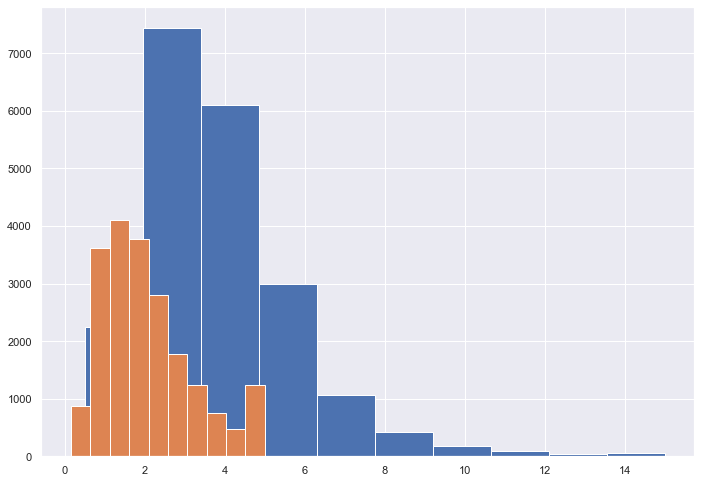

In [13]:
calf_hous_df["MedInc"].hist()
calf_hous_df["Y_var"].hist()


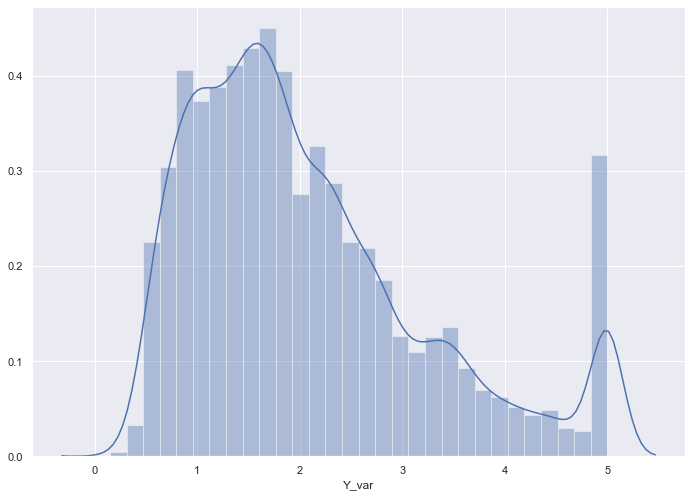

In [5]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(calf_hous_df['Y_var'], bins=30)
plt.show()

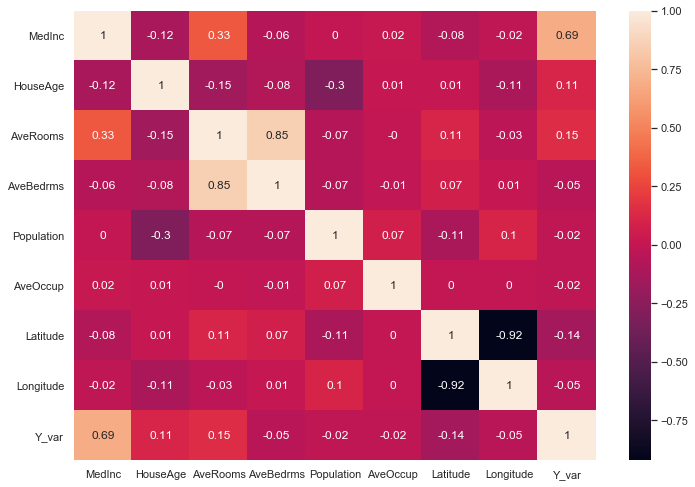

In [6]:
correlation_matrix = calf_hous_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Latitude and longitude are very strongly correlated


Y_var is strongly correlated to Medinc as well


ave bedrooms are strongly correlated to averooms


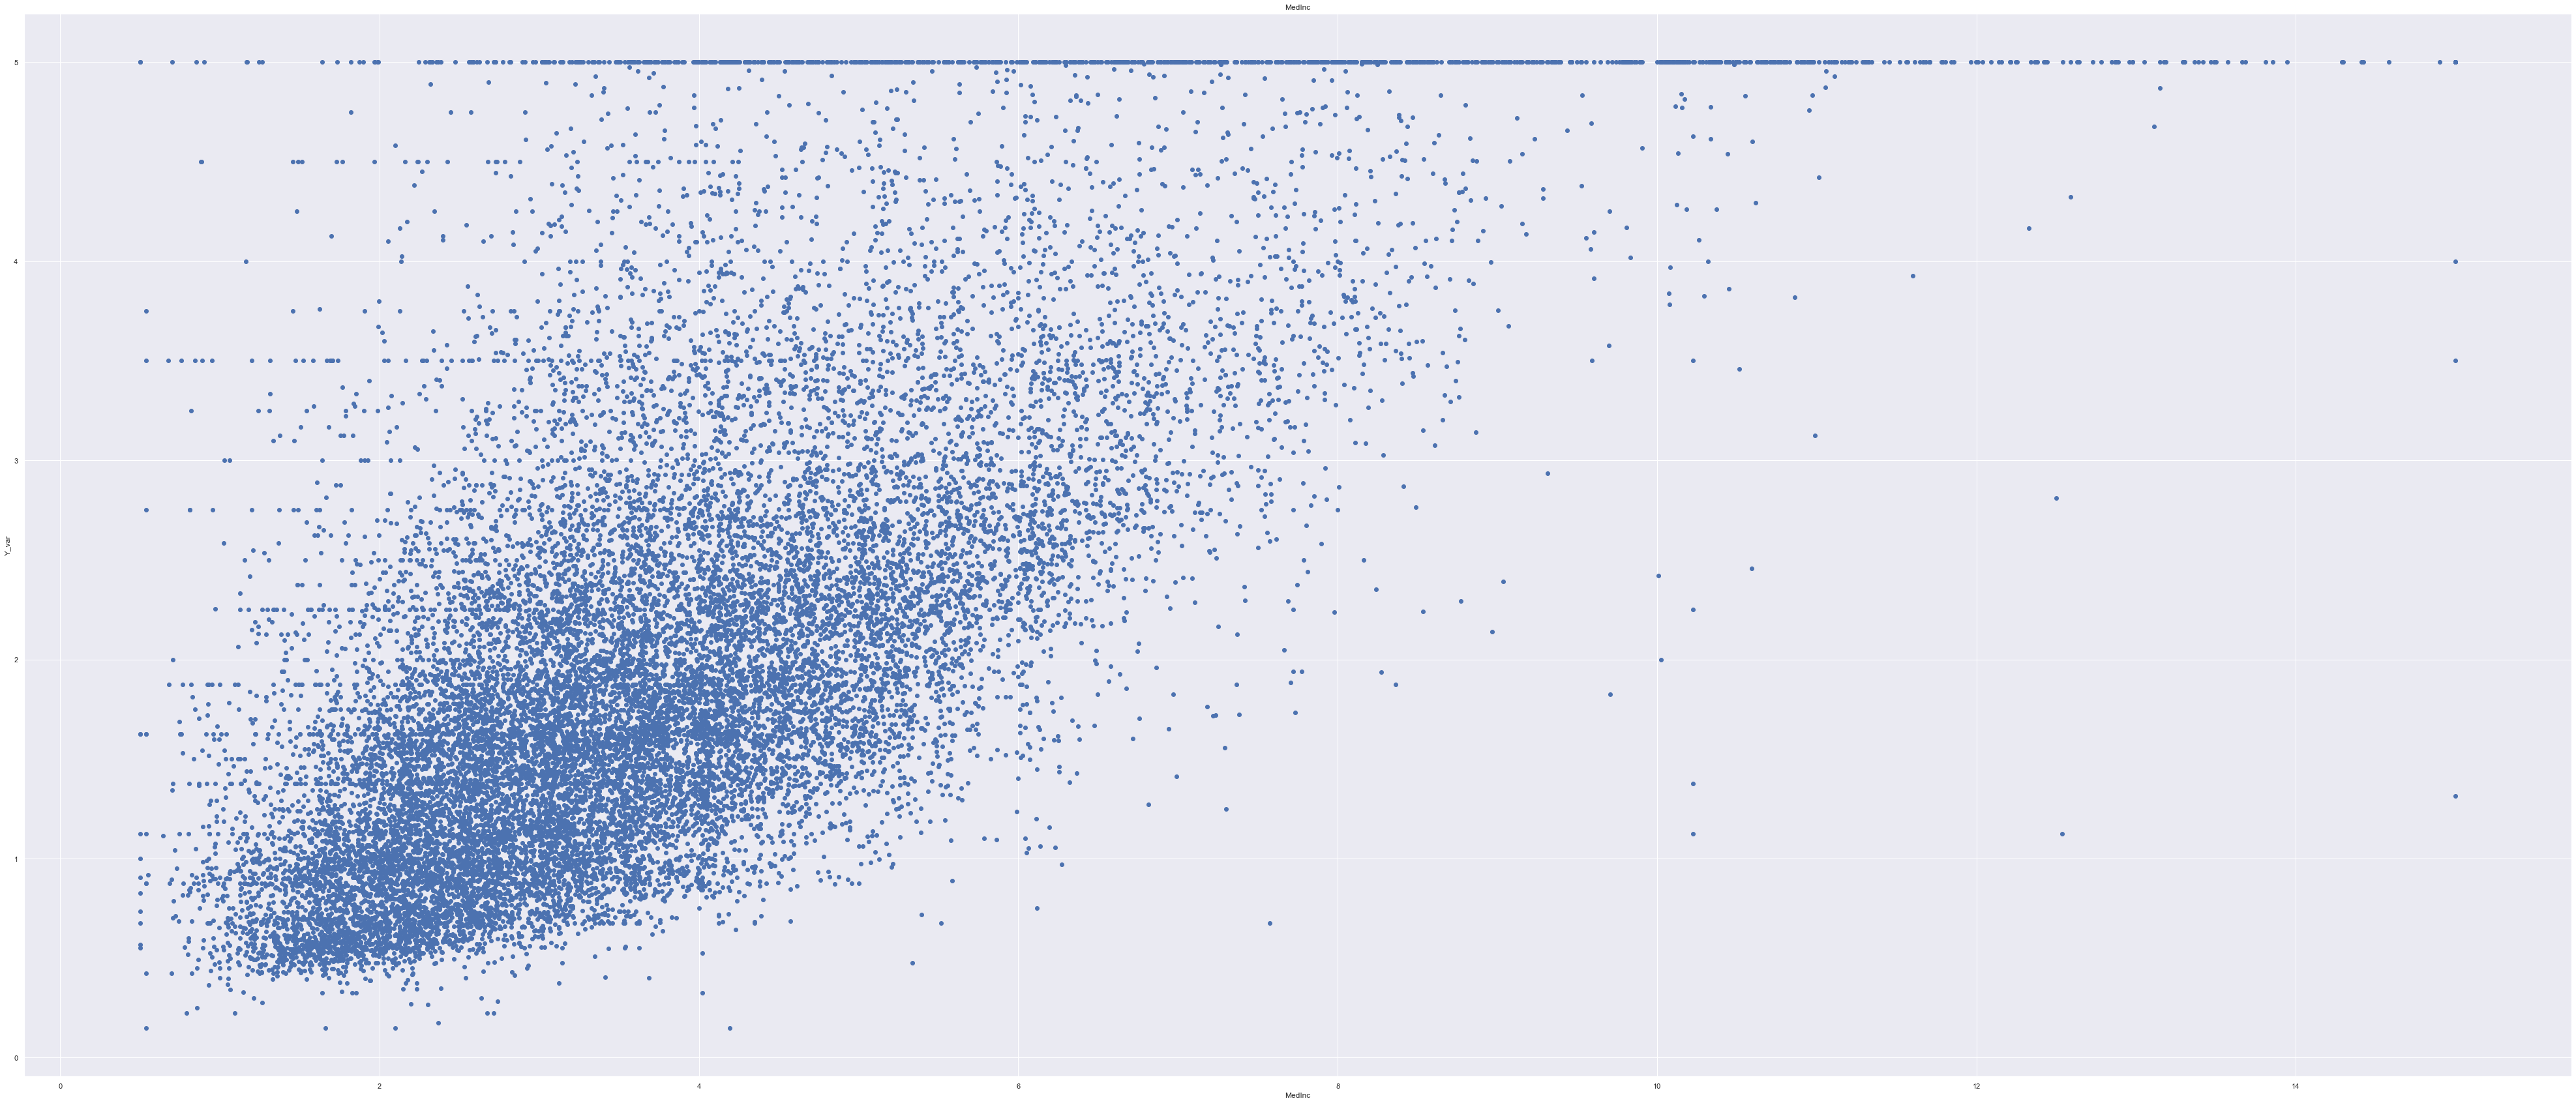

In [7]:
plt.figure(figsize=(70, 30))

features = ["MedInc"]
target = calf_hous_df['Y_var']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = calf_hous_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Y_var')

In [8]:
X = pd.DataFrame(np.c_[calf_hous_df['AveRooms'], calf_hous_df['AveBedrms'],calf_hous_df["Latitude"],calf_hous_df["Longitude"]], columns = ['AveRooms','AveBedrms',"Latitude","Longitude"])
Y = calf_hous_df['Y_var']
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 4)
(4128, 4)
(16512,)
(4128,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.8951223017750218
R2 score is 0.39272475785728866


The model performance for testing set
--------------------------------------
RMSE is 0.9028567223453837
R2 score is 0.4091761334306674


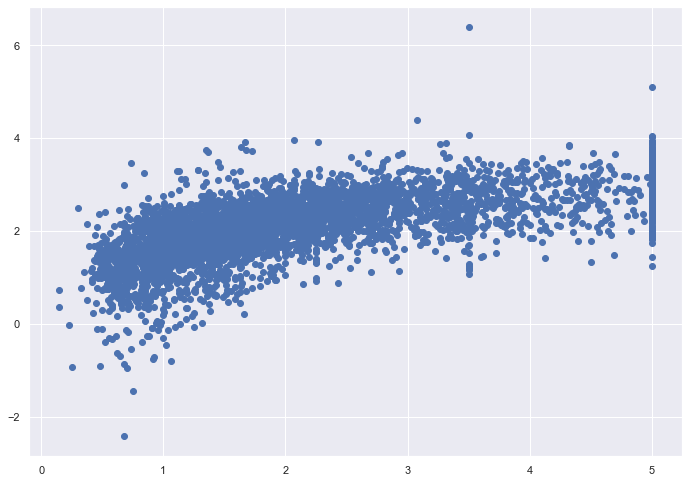

In [11]:

# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()